In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
from google.colab import drive
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [5]:
drive.mount('/content/drive')
train=pd.read_csv('/content/Train_data.csv')
test=pd.read_csv('/content/Test_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [8]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [10]:
train.shape

(25192, 42)

In [11]:
train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


Number of duplicate rows: 0
Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


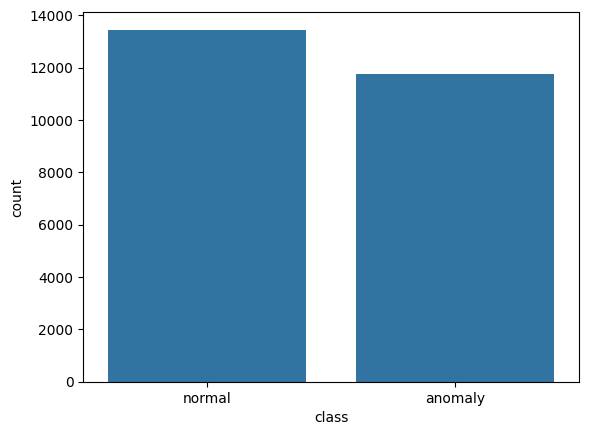

In [12]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")
print(f"Number of duplicate rows: {train.duplicated().sum()}")
sns.countplot(x=train['class'])
print('Class distribution Training set:')
print(train['class'].value_counts())

In [18]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

In [25]:
le(train)
le(test)


In [27]:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]
X_train = X_train[selected_features]
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)
x_train.shape
x_test.shape
y_train.shape
x_test.shape

(7558, 10)

In [28]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [29]:
# Logistic Regression
clfl = LogisticRegression(max_iter=1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Logistic Regression - Training time: ", end_time-start_time)

Logistic Regression - Training time:  0.06387829780578613


In [30]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
start_time = time.time()
knn.fit(x_train, y_train)
end_time = time.time()
print("K-Nearest Neighbors - Training time: ", end_time-start_time)

K-Nearest Neighbors - Training time:  0.033061981201171875


In [31]:
# Decision Tree
clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Decision Tree - Training time: ", end_time-start_time)

Decision Tree - Training time:  0.03527665138244629


In [32]:
# XGBoost
xgb = XGBClassifier()
start_time = time.time()
xgb.fit(x_train, y_train)
end_time = time.time()
print("XGBoost - Training time: ", end_time-start_time)

XGBoost - Training time:  0.29516053199768066


In [34]:
# Evaluate models
models = {'Logistic Regression': clfl, 'K-Nearest Neighbors': knn, 'Decision Tree': clfd, 'XGBoost': xgb}
for name, model in models.items():
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"{name} - Train Score: {train_score}, Test Score: {test_score}")

Logistic Regression - Train Score: 0.9287739593966202, Test Score: 0.9231278115903678
K-Nearest Neighbors - Train Score: 0.9872972666439832, Test Score: 0.9830643027255888
Decision Tree - Train Score: 0.9799818532380629, Test Score: 0.9801534797565493
XGBoost - Train Score: 1.0, Test Score: 0.9960306959513099


<Axes: >

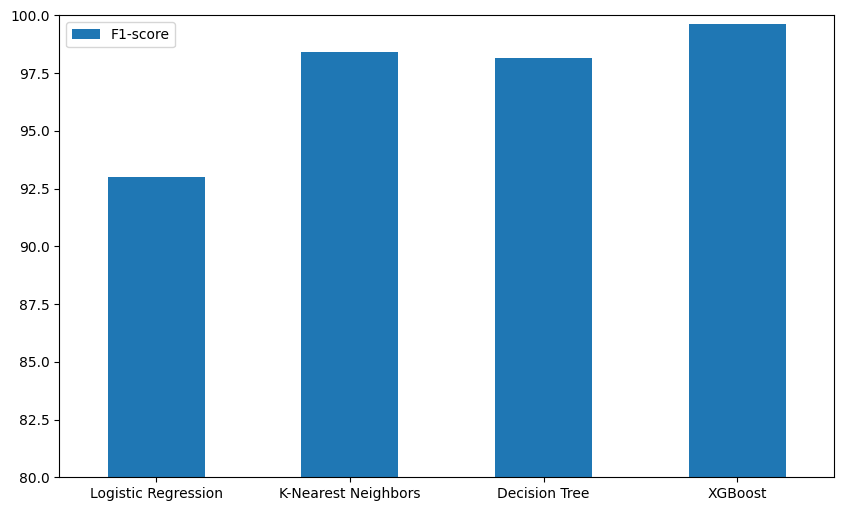

In [33]:
# Validation using F1 Score
f1s = {}
for name, model in models.items():
    preds = model.predict(x_test)
    f1s[name] = f1_score(y_test, preds)

f1s = pd.DataFrame(f1s.values(), index=f1s.keys(), columns=["F1-score"]) * 100
f1s.plot(kind="bar", ylim=[80, 100], figsize=(10, 6), rot=0)

Logistic Regression Model Testing
[[3127  371]
 [ 210 3850]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3498
           1       0.91      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558



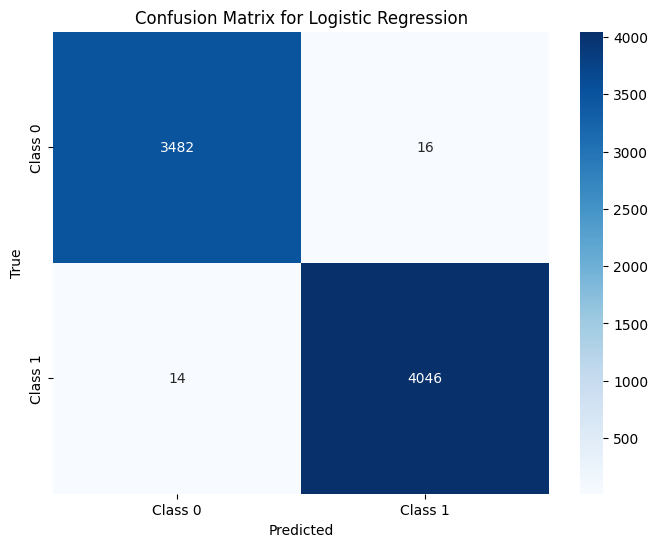

K-Nearest Neighbors Model Testing
[[3435   63]
 [  65 3995]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3498
           1       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



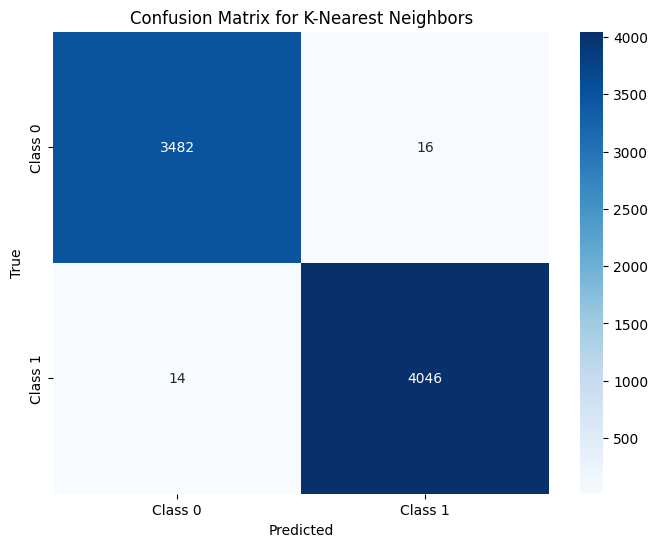

Decision Tree Model Testing
[[3425   73]
 [  77 3983]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3498
           1       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



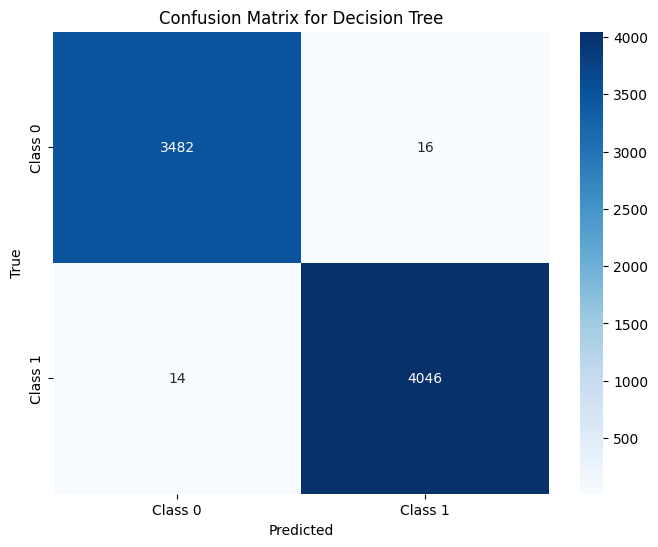

XGBoost Model Testing
[[3482   16]
 [  14 4046]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



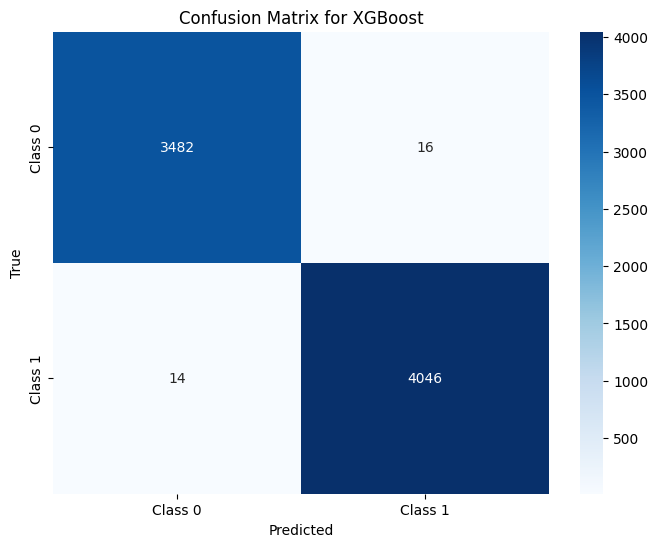

In [37]:
# Confusion Matrix and Classification Report
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

for name, model in models.items():
    preds = model.predict(x_test)
    print(f"{name} Model Testing")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))

    plot_confusion_matrix(cm, name)